In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv('purchase_behaviour.csv')
df1.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [3]:
df2 = pd.read_csv('transaction_data.csv')
df2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


# for profitable customer

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [5]:
df1.duplicated().sum()

0

In [6]:
df1.select_dtypes(include='object').columns

Index(['LIFESTAGE', 'PREMIUM_CUSTOMER'], dtype='object')

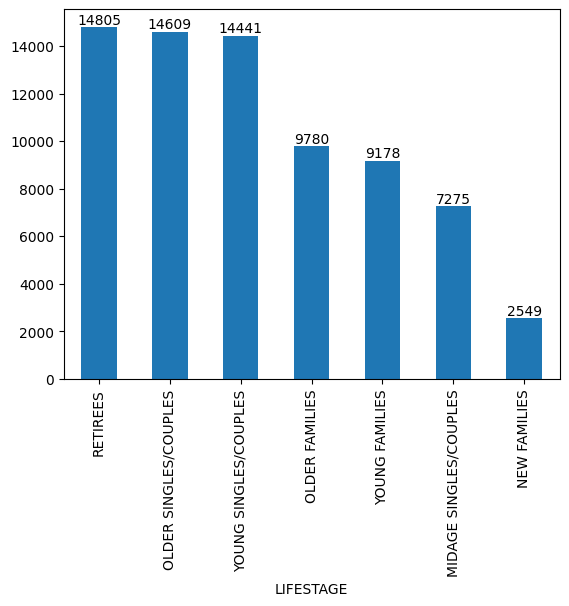

In [7]:
ax=df1['LIFESTAGE'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

<Axes: ylabel='count'>

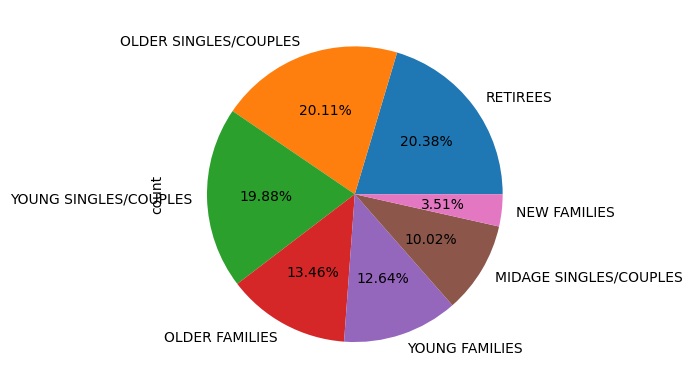

In [8]:
df1['LIFESTAGE'].value_counts().plot(kind='pie',autopct='%.2f%%')


* Mostly customers are either `retirees`, `older singles/couples` or `young singles/couples`

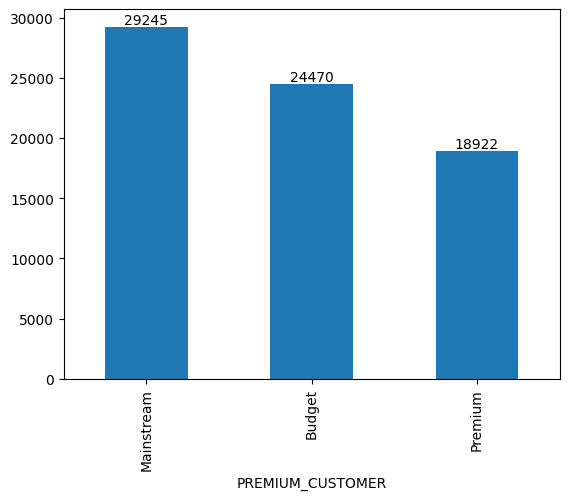

In [9]:
ax=df1['PREMIUM_CUSTOMER'].value_counts().plot(kind='bar')
for i in ax.containers:
    ax.bar_label(i)

<Axes: ylabel='count'>

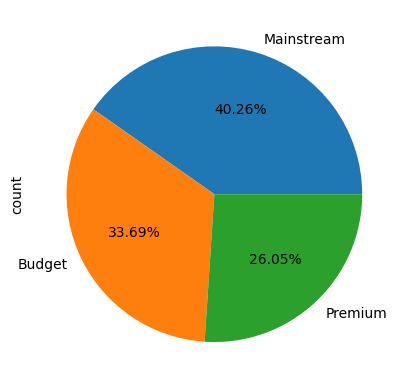

In [10]:
df1['PREMIUM_CUSTOMER'].value_counts().plot(kind='pie',autopct='%.2f%%')

* most of the customers are AVERAGE and premium are least

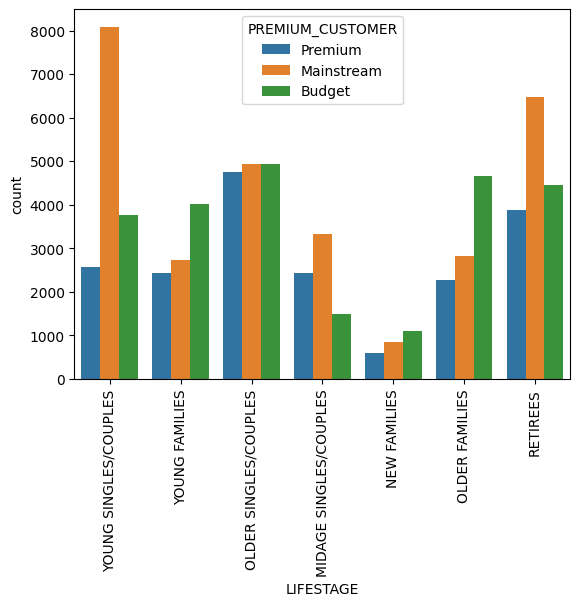

In [11]:
sns.countplot(x=df1['LIFESTAGE'],hue=df1.PREMIUM_CUSTOMER,data=df1)
plt.xticks(rotation=90);

* `older singles/couples` are most premium customer among all

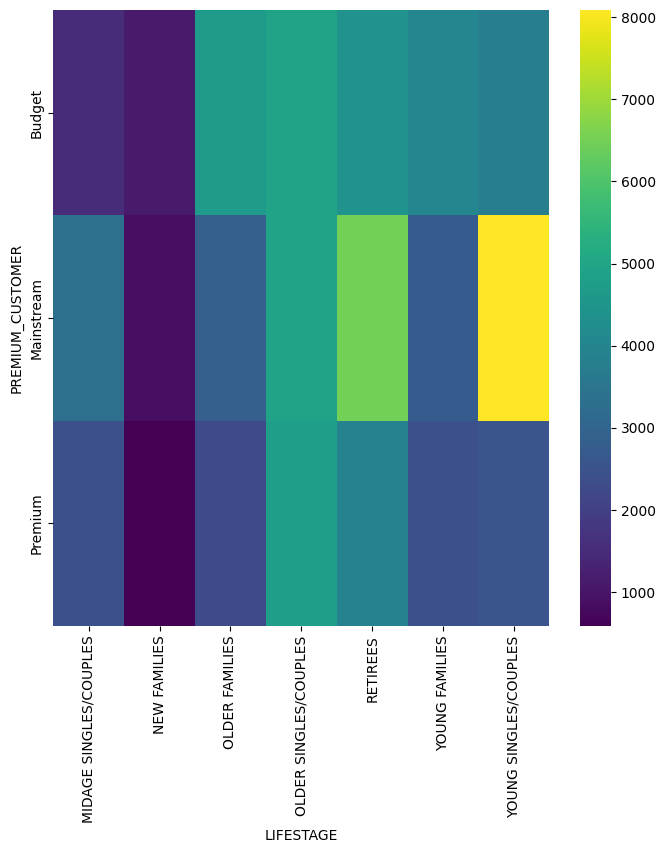

In [12]:
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['PREMIUM_CUSTOMER'].value_counts()
    for x_label, grp in df1.groupby('LIFESTAGE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('LIFESTAGE')
_ = plt.ylabel('PREMIUM_CUSTOMER')

# Conclusion
* From above analysis is seen that older people are more than other category
* Also older people are more premium customer
* Most of the people are likely to buy the Mainstream food


# for Product

In [13]:
df2.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [15]:
df2.select_dtypes(include='number').columns

Index(['DATE', 'STORE_NBR', 'LYLTY_CARD_NBR', 'TXN_ID', 'PROD_NBR', 'PROD_QTY',
       'TOT_SALES'],
      dtype='object')

In [20]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264835 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264835 non-null  int64  
 1   STORE_NBR       264835 non-null  int64  
 2   LYLTY_CARD_NBR  264835 non-null  int64  
 3   TXN_ID          264835 non-null  int64  
 4   PROD_NBR        264835 non-null  int64  
 5   PROD_NAME       264835 non-null  object 
 6   PROD_QTY        264835 non-null  int64  
 7   TOT_SALES       264835 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 18.2+ MB


In [19]:
df2.duplicated().sum()

0

In [18]:
df2.drop_duplicates(inplace=True)

In [21]:
df2['PROD_NAME'].value_counts()

,count
PROD_NAME,
Kettle Mozzarella Basil & Pesto 175g,3304
Kettle Tortilla ChpsHny&Jlpno Chili 150g,3296
Cobs Popd Swt/Chlli &Sr/Cream Chips 110g,3269
Tyrrells Crisps Ched & Chives 165g,3268
Cobs Popd Sea Salt Chips 110g,3265
...,...
RRD Pc Sea Salt 165g,1431
Woolworths Medium Salsa 300g,1430
NCC Sour Cream & Garden Chives 175g,1419


In [22]:
product_sales = df2.groupby(['PROD_NBR', 'PROD_NAME'])['TOT_SALES'].sum().reset_index()
product_sales

,PROD_NBR,PROD_NAME,TOT_SALES
0,1,Smiths Crinkle Cut Chips Barbecue 170g,8125.8
1,2,Cobs Popd Sour Crm &Chives Chips 110g,22944.4
2,3,Kettle Sensations Camembert & Fig 150g,28308.4
3,4,Dorito Corn Chp Supreme 380g,40352.0
4,5,Natural Chip Compny SeaSalt175g,8331.0
...,...,...,...
109,110,WW Original Corn Chips 200g,5367.5
110,111,Smiths Chip Thinly Cut Original 175g,9135.0
111,112,Tyrrells Crisps Ched & Chives 165g,26149.2
112,113,Twisties Chicken270g,27853.0


In [23]:
top_products = product_sales.nlargest(3, 'TOT_SALES')
top_products

,PROD_NBR,PROD_NAME,TOT_SALES
3,4,Dorito Corn Chp Supreme 380g,40352.0
13,14,Smiths Crnkle Chip Orgnl Big Bag 380g,36367.6
15,16,Smiths Crinkle Chips Salt & Vinegar 330g,34804.2


In [27]:
loyal_customers = df2.groupby('LYLTY_CARD_NBR').agg(
    total_sales=('TOT_SALES', 'sum'),
    transaction_count=('TXN_ID', 'nunique')
).reset_index()

In [28]:
loyal_customers

,LYLTY_CARD_NBR,total_sales,transaction_count
0,1000,6.0,1
1,1002,2.7,1
2,1003,6.6,2
3,1004,1.9,1
4,1005,2.8,1
...,...,...,...
72632,2370651,13.0,1
72633,2370701,7.2,1
72634,2370751,9.2,1
72635,2370961,18.6,2


In [29]:
# Filter for loyal customers (e.g., more than 5 transactions)
loyal_customers = loyal_customers[loyal_customers['transaction_count'] > 5]

In [30]:
loyal_customers

,LYLTY_CARD_NBR,total_sales,transaction_count
673,3015,53.6,6
679,3022,80.9,9
681,3024,49.9,6
688,3031,55.9,6
693,3036,57.0,7
...,...,...,...
72343,272037,57.2,6
72375,272078,53.6,6
72469,272208,48.1,6
72477,272218,58.8,6


In [31]:
loyal_customer_summary = {
    'Total Loyal Customers': loyal_customers.shape[0],
    'Average Total Sales': loyal_customers['total_sales'].mean(),
    'Average Transactions': loyal_customers['transaction_count'].mean()
}

In [32]:
for key, value in loyal_customer_summary.items():
    print(f"{key}: {value:.2f}")

Total Loyal Customers: 16653.00
Average Total Sales: 55.69
Average Transactions: 7.57


Hypothesis =
Loyal customers tend to prefer products that offer consistent quality and value.
They may be attracted to brands that align with their lifestyle choices, such as healthier snack options or unique flavors.
Additionally, loyalty programs or discounts may incentivize repeat purchases of specific products.
